<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_MachineLearning/blob/main/LinearDiscriminantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue"><b><i>Linear Discriminant Analsysis</i></b></font> 
<br>Linear Discriminant Analysis (LDA) is similar to Principal Component Analysis (PCA) in reducing the dimensionality. However, there are certain nuances with LDA that we should be aware of-

LDA is supervised (needs categorical dependent variable) to provide the best linear combination of original variables while providing the maximum separation among the different groups. On the other hand, PCA is unsupervised
LDA can be used for classification also, whereas PCA is generally used for unsupervised learning
LDA doesn’t need the numbers of discriminant to be passed on ahead of time. Generally speaking the number of discriminant will be lower of the number of variables or number of categories-1.
LDA is more robust and can be conducted without even standardizing or normalizing the variables in certain cases
LDA is preferred for bigger data sets and machine learning.

In [1]:
# Import the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import SK Learn model for doing ML Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

from sklearn.model_selection import GridSearchCV

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

wine.columns = ['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue','OD280/OD315_of_diluted_wines', 'Proline']

In [3]:
wine.head(5)

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape
wine.Class_label.nunique()
wine.groupby('Class_label').size()
means = np.round(pd.pivot_table(wine, values=['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue','OD280/OD315_of_diluted_wines', 'Proline'], index='Class_label', aggfunc=np.mean),2)
means

(178, 14)

3

Class_label
1    59
2    71
3    48
dtype: int64

,Alcalinity_of_ash,Alcohol,Ash,Color_intensity,Flavanoids,Hue,Magnesium,Malic_acid,Nonflavanoid_phenols,OD280/OD315_of_diluted_wines,Proanthocyanins,Proline,Total_phenols
Class_label,,,,,,,,,,,,,
1,17.04,13.74,2.46,5.53,2.98,1.06,106.34,2.01,0.29,3.16,1.90,1115.71,2.84
2,20.24,12.28,2.24,3.09,2.08,1.06,94.55,1.93,0.36,2.79,1.63,519.51,2.26
3,21.42,13.15,2.44,7.40,0.78,0.68,99.31,3.33,0.45,1.68,1.15,629.90,1.68


### <font color="blue">Create feature and label for classification</font>

In [5]:
x = wine.drop(['Class_label'],axis=1, inplace=False)
y= wine['Class_label']
x.shape
y.shape

(178, 13)

(178,)

### <font color="blue">Standardize the data</font>

In [8]:
from sklearn.preprocessing import scale
x_scaled = scale(x)

In [14]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.tail(5)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


In [17]:
np.round(x_scaled.describe(),2)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


### <font color="blue">Create Train and Test Datasets</font>

In [11]:
#Create training and test data
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=999)

In [12]:
train_y.value_counts()

2    51
1    49
3    42
Name: Class_label, dtype: int64

In [13]:
test_y.value_counts()

2    20
1    10
3     6
Name: Class_label, dtype: int64

# <font color="blue">Fit LDA on Training data</font>

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis()
transfer_lda = sklearn_lda.fit(train_x, train_y)

In [20]:
#Explained variance
str(transfer_lda.explained_variance_ratio_)

'[0.70332145 0.29667855]'

## <font color="blue">confusion Metrics</font>

In [21]:
from sklearn import metrics
print("Confusion MEtrics of LDA classifer")
print(metrics.confusion_matrix(test_y, sklearn_lda.predict(test_x)))


Confusion MEtrics of LDA classifer
[[10  0  0]
 [ 0 19  1]
 [ 0  0  6]]


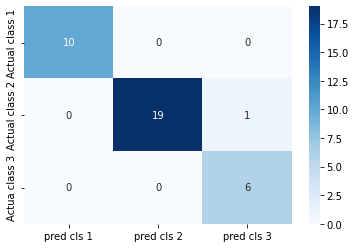

In [23]:
sns.heatmap((metrics.confusion_matrix(test_y, sklearn_lda.predict(test_x))), cmap='Blues', xticklabels=['pred cls 1','pred cls 2','pred cls 3'], yticklabels=['Actual class 1','Actual class 2','Actua class 3'],annot=True, fmt='d')
plt.show()

In [24]:
#Compute the accuracy of the classification
metrics.accuracy_score(test_y, sklearn_lda.predict(test_x))

0.9722222222222222

## <font color="blue">LDA without standardizing the same data</font>

In [25]:
x = wine.iloc[:,1:]
y = wine.iloc[:,0]
type(x)
#Create training and test data
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=999)

pandas.core.frame.DataFrame

In [26]:
lda = LinearDiscriminantAnalysis().fit(train_x,train_y)

In [27]:
#Compute the accuracy of the classification
metrics.accuracy_score(test_y, sklearn_lda.predict(test_x))

0.9722222222222222

## So, without scaling of data accuracy is same.

In [31]:
#LDs
df = np.round(pd.DataFrame(lda.scalings_, index = x.columns, columns=('LD1','LD2')),2)
df

,LD1,LD2
Alcohol,-0.29,0.83
Malic_acid,0.16,0.30
Ash,0.03,2.54
Alcalinity_of_ash,0.12,-0.16
Magnesium,-0.00,0.01
Total_phenols,0.60,-0.05
Flavanoids,-1.66,-0.50
Nonflavanoid_phenols,-1.85,-1.31
Proanthocyanins,0.05,-0.52
Color_intensity,0.33,0.20


In [32]:
#Explained variance
str(lda.explained_variance_ratio_)

'[0.70332145 0.29667855]'

## <font color="blue">Use LD as input in Logistic Regression</font>

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 0, 'LD1')

Text(0, 0.5, 'LD2')

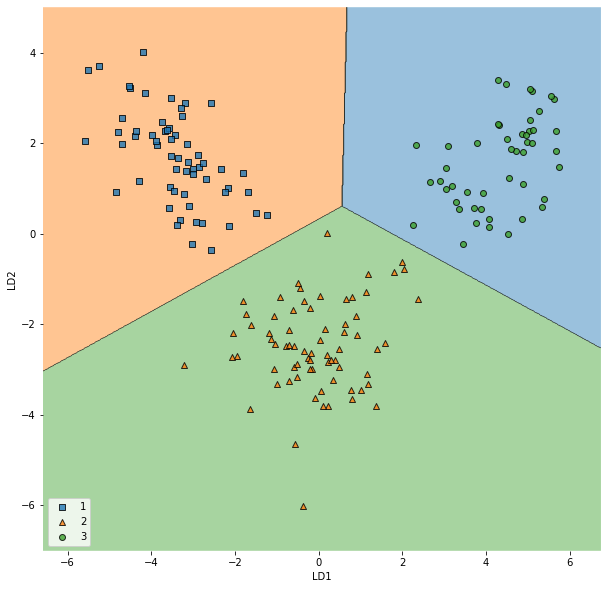

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.plotting import plot_decision_regions
lda = LinearDiscriminantAnalysis()
from sklearn.linear_model import LogisticRegression

x_train_lda = lda.fit_transform(x, y)
y = np.array(y)
lr = LogisticRegression()
lr = lr.fit(x_train_lda, y)
plt.figure(figsize=(10,10))
plot_decision_regions(x_train_lda, y, clf=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc = 'lower left')
plt.show()